For all the cells involving YOLO, a .names file containing the names of the two classes (blob, dot) on two separate lines must be present in the folder containing the labels and images folders.

# Rating pipeline

### Clone the Git repos

In [ ]:
!git clone https://github.com/GreatTommy/pr_computer_vision
!git clone https://github.com/GreatTommy/yolov3

Cloning into 'pr_computer_vision'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 344 (delta 68), reused 90 (delta 34), pack-reused 185
Receiving objects: 100% (344/344), 20.94 MiB | 6.20 MiB/s, done.
Resolving deltas: 100% (132/132), done.
Cloning into 'yolov3'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 121 (delta 54), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (121/121), 1.33 MiB | 1.08 MiB/s, done.
Resolving deltas: 100% (54/54), done.


### Imports

In [ ]:
from google.colab import files
import pr_computer_vision.yolorating as yr

USER_PATH :  /content
USER_PATH :  /content


### Import the images dataset on which to perform the detection

In [ ]:
!wget # some url
!unzip -qq /content/demo_dataset.zip
!rm -rf /content/demo_dataset.zip

### Import the pretrained YOLO weights

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/My\ Drive/PR\ P20/WEIGHTS/tiny_weights.pt /content/yolov3/weights/
!cp /content/drive/My\ Drive/PR\ P20/WEIGHTS/normal_weights.pt /content/yolov3/weights/

Crop images and/or convert them to grayscale and/or resize them

In [ ]:
directory_path = "/content/demo_dataset"
crop = True
grey_shades = True
resize = False
yr.alter_images(directory_path, crop, grey_shades, resize)

Cropping the images ...
Altering the images ...


### Perform the detection

#### Without saving of the labelled images, only to get the ratings

In [ ]:
input_dir_path = "demo_dataset"
output_dir_name = "yolo_detections"

!python3 yolov3/detect.py --source $input_dir_path --cfg yolov3/cfg/yolov3-tiny-2cls.cfg \
  --weights yolov3/weights/tiny_weights.pt --conf-thres 0.01 --save-txt \
  --output $output_dir_name --names yolov3/data/yolo_pr.names
yr.remove_labelled_images(output_dir_name)

Namespace(agnostic_nms=False, augment=False, cfg='yolov3/cfg/yolov3-tiny-2cls.cfg', classes=None, conf_thres=0.01, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='yolov3/data/yolo_pr.names', output='yolo_detections', save_txt=True, source='demo_dataset', view_img=False, weights='yolov3/weights/tiny_weights.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 37 layers, 8.67219e+06 parameters, 8.67219e+06 gradients
image 1/100 demo_dataset/255_1.png: 512x128 2 dots, Done. (0.007s)
image 2/100 demo_dataset/255_10.png: 512x128 Done. (0.007s)
image 3/100 demo_dataset/255_2.png: 512x128 1 dots, Done. (0.007s)
image 4/100 demo_dataset/255_3.png: 512x128 3 dots, Done. (0.007s)
image 5/100 demo_dataset/255_4.png: 512x192 3 dots, Done. (0.008s)
image 6/100 demo_dataset/255_5.png: 512x192 Done. (0.009s)
image 7/100 demo_dataset/255_6.png: 512x192 2 dots, Done. (0.008s)
image 8/100 demo_dataset/255_7.png: 512x192 3 dots, D

#### With saving of the labelled images, **not** suited for rating

In [ ]:
input_dir_name = "input_images"
output_dir_name = "labelled_images"

!python3 yolov3/detect.py --source $input_dir_name --cfg yolov3/cfg/yolov3-2cls.cfg \
        --weights yolov3/weights/normal_weights.pt --conf-thres 0.3 \
        --output $output_dir_name --names yolov3/data/yolo_pr.names
        
!zip -qq -r $output_dir_name $output_dir_name
files.download(f"{output_dir_name}.zip")

### Perform the rating and download the results

In [ ]:
path_to_detections = "yolo_detections"
path_to_weights = "pr_computer_vision/yolorating/weights/weights_rating_nn.pt"

yr.run_inference(path_to_detections, path_to_weights)

files.download("ratings.json")

!cat ratings.json

100%|██████████| 100/100 [00:00<00:00, 894.78it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{"355": [10.0, 10.0, 7.5, 5.0, 7.5, 10.0, 5.0, 5.0, 7.5, 7.5], "255": [10.0, 10.0, 7.5, 7.5, 10.0, 7.5, 7.5, 10.0, 10.0, 10.0], "299": [7.5, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0], "321": [7.5, 7.5, 5.0, 7.5, 7.5, 10.0, 7.5, 7.5, 7.5, 10.0], "287": [7.5, 7.5, 10.0, 10.0, 10.0, 7.5, 10.0, 10.0, 10.0, 10.0], "311": [7.5, 5.0, 5.0, 5.0, 5.0, 7.5, 5.0, 5.0, 7.5, 5.0], "343": [7.5, 10.0, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5], "274": [7.5, 10.0, 10.0, 7.5, 7.5, 7.5, 10.0, 10.0, 10.0, 10.0], "334": [10.0, 10.0, 10.0, 7.5, 10.0, 7.5, 10.0, 10.0, 10.0, 7.5], "264": [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]}

# Prepare the trainset and devset (to be run on your local machine)

Copies and splits the data into two folders to be used for training and development without modifying the three source folders. If you wish to work with the large images containing ten images, alter_images() allows you to crop them as well as resizing and/or converting to grayscale. The trainset is double-labelled while the devset contains Florent's and Thomas' labels alternatively. A .data file will be created, which you must put into the folder containing the labels and images folders.

Please ensure the current path contains the three labels and images folders when this cell is run - the two resulting folders will be placed at this path too. 

To prevent a variation in YOLO performances due to repeted runs of the script - which relies on a "shuffle" to split data into the trainset and devset - names_file.txt will be created at the first run, then read everytime the cell is re-run. This way, you can remove your trainset and devset inadvertently or test different configurations of alter_images() while preserving the same splitting into your trainset and devset.

In [ ]:
create_trainset_and_devset(
    labels_src_dir1 = "labelsF",
    labels_src_dir2 = "labelsT",
    images_src_dir = "images",
    train_dest_dir = "trainset",
    dev_dest_dir = "devset"
)

# Train YOLO

Don't forget the .data file!

### Import the dataset (created with create_trainset_and_devset) on which to perform the training

In [ ]:
!wget # some url
!unzip -qq /content/yolo_pr.zip -d /content/yolov3
!rm -rf /content/yolo_pr.zip

### Perform the training

In [ ]:
data_file_path = "yolo_pr/yolo_pr.data"
config = "cfg/yolov3-tiny-2cls.cfg"
n_epochs = 50 # not enough for a real training, just for a demo
batch_size = 16

%cd /content/yolov3
train_options = f"--data {data_file_path} --cfg {config} --batch {str(batch_size)} \
  --epochs {str(n_epochs)} --weights '' --cache --nosave"

!python3 train.py $train_options
%cd /content

/content/yolov3
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-tiny-2cls.cfg', data='yolo_pr/yolo_pr.data', device='', epochs=50, evolve=False, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-07-13 18:27:28.649676: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 37 layers, 8.67219e+06 parameters, 8.67219e+06 gradients
Optimizer groups: 13 .bias, 13 Conv2d.weight, 11 other
Reading image shapes: 100% 602/602 [00:00<00:00, 705.49it/s]
Caching labels yolo_pr/trainset/trainset.txt (602 found, 0 missing, 0 empty, 0 dupli

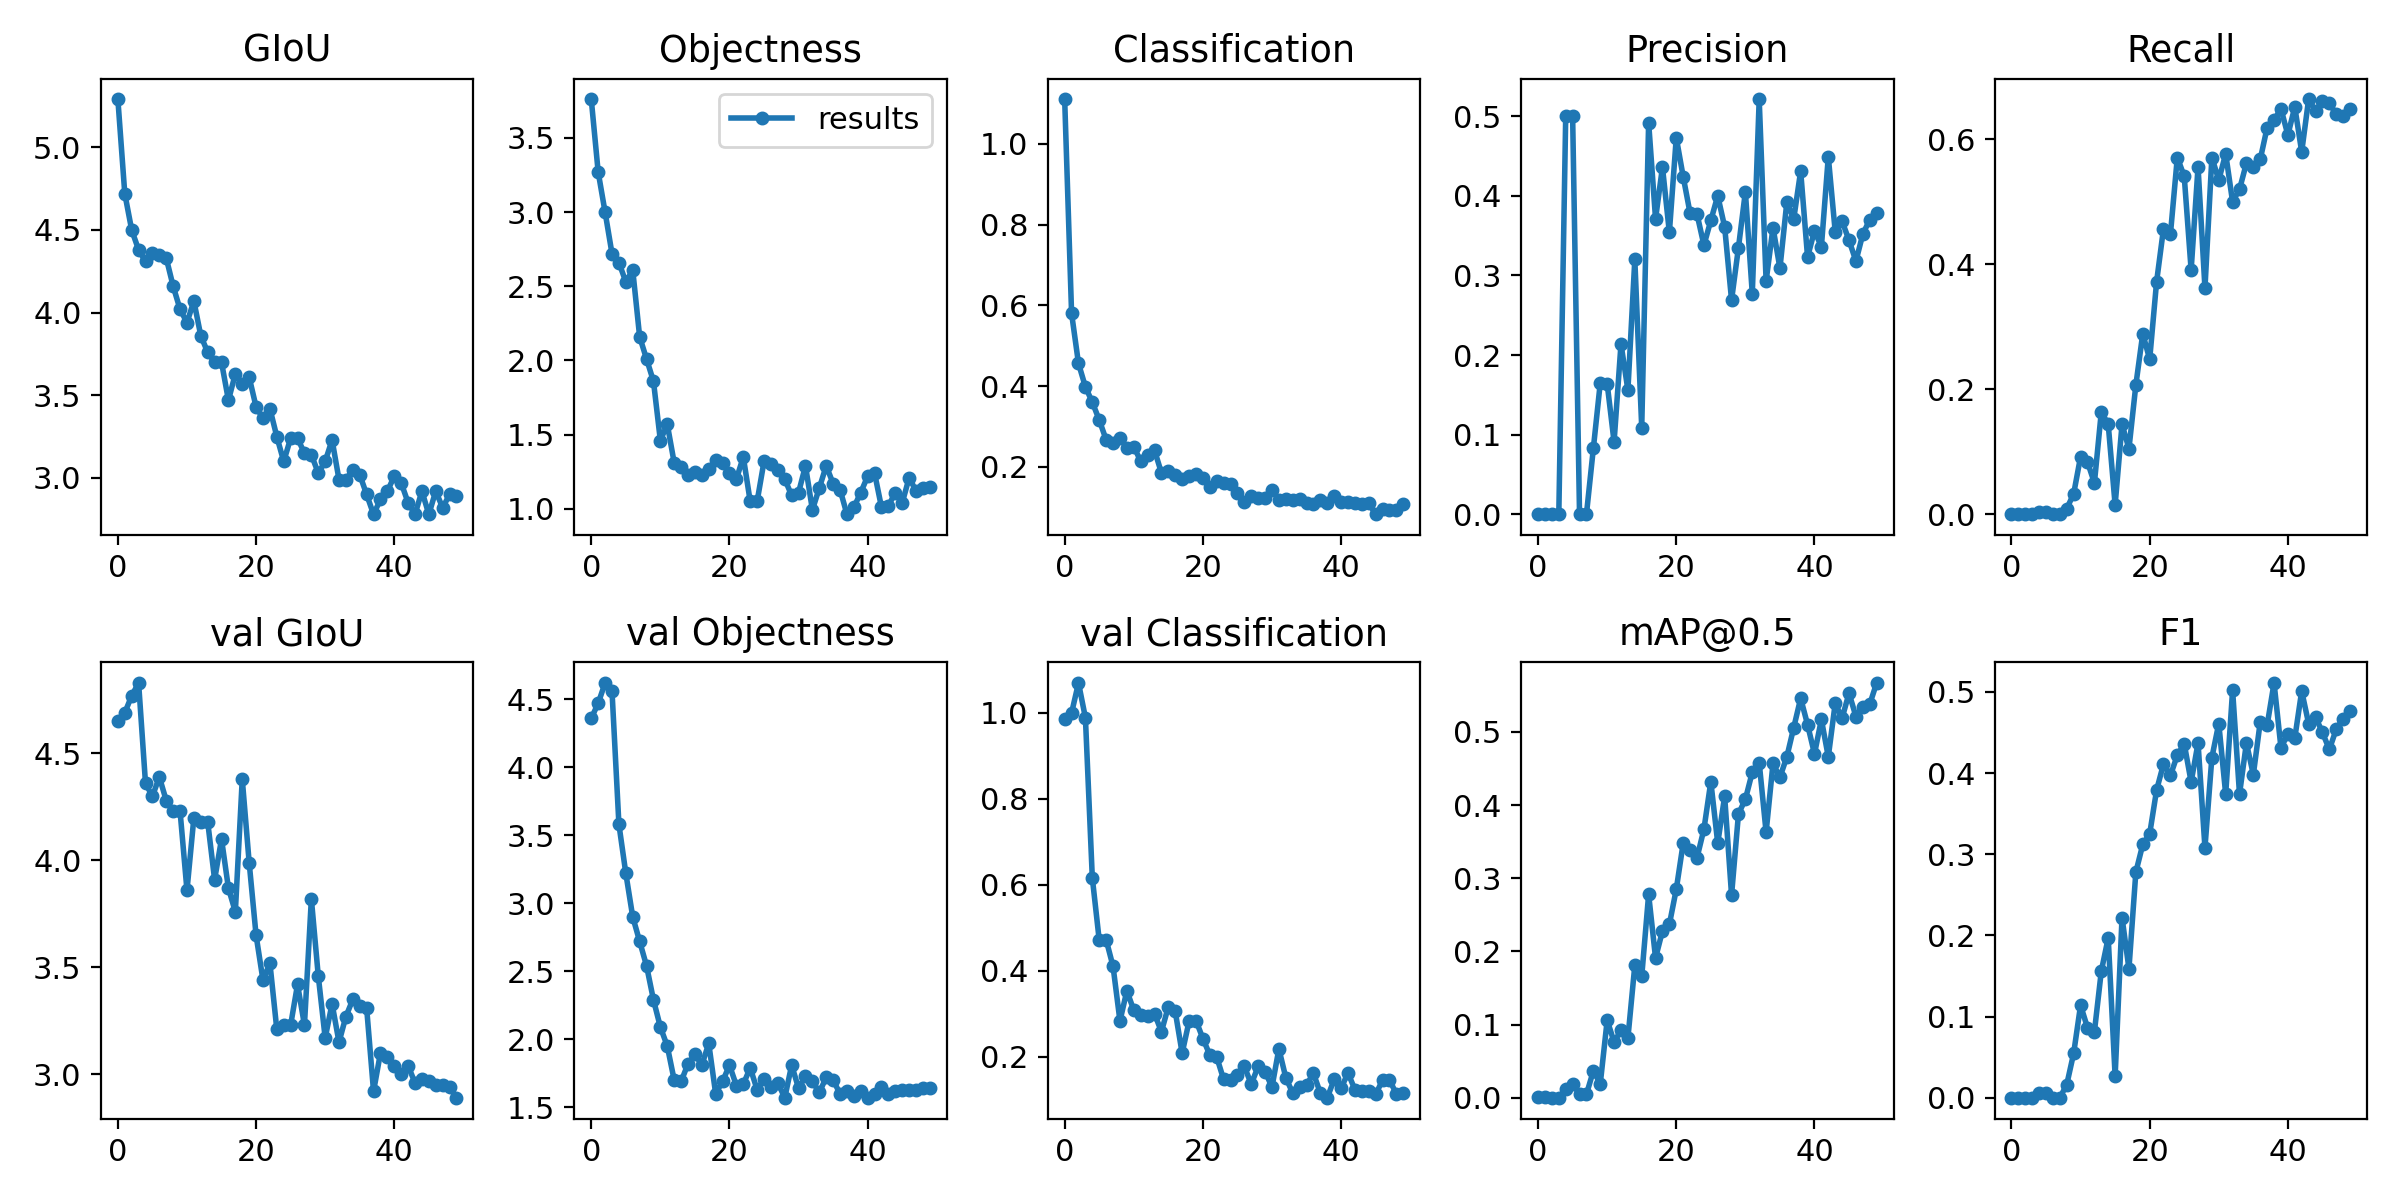

In [ ]:
from IPython.display import Image 
pil_img = Image(filename="/content/yolov3/results.png")
display(pil_img)

# Compute and display the precision and recall graphs (to be run on your local machine)

For the trainset *and* the devset, make sure you:

1.   downloaded precisionRecall.txt after having run the Perform test cell 
2.   renamed it trainsetPrecisionRecall.txt or devsetPrecisionRecall.txt depending on the set on which you performed the test
3.   moved it to the folder containing the three source labels and images folders

The precision and recall graphs will be stored in PDF format.

The useless folders created by the script will be removed at the end of its execution.





Human precision for blobs :  0.8
Human recall for blobs :  0.7927927927927928 

Human precision for dots :  0.6234718826405868
Human recall for dots :  0.602125147579693 



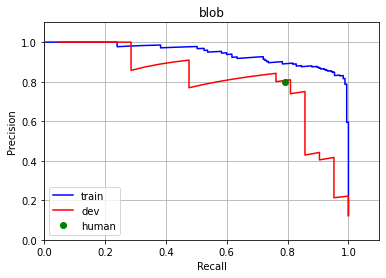

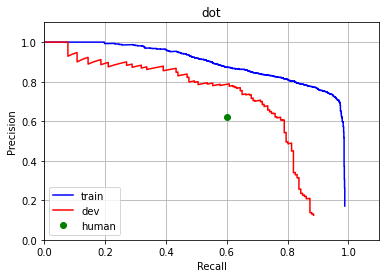

<Figure size 432x288 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/My\ Drive/PR\ P20/GRAPHS/Training.zip /content/
!unzip -qq /content/Training.zip

yr.compare_all_precisions_and_recalls()

# Rating algorithm demo

### Import the detections dataset

In [ ]:
!wget # some url
!unzip -qq /content/rating_dataset.zip
!rm -rf /content/rating_dataset.zip

### Fit a linear regression model to the dataset

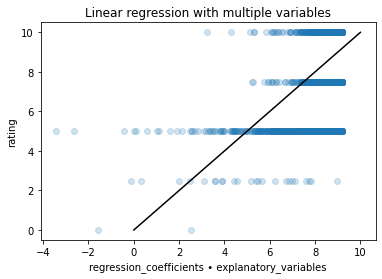

In [ ]:
path_to_detections = "rating_dataset"
yr.regression(path_to_detections)

### Training of the rating neural network used in the rating pipeline

In [ ]:
path_to_detections = "rating_dataset"
input_size = 30
batch_size = 32
learning_rate = 0.0005
ratio_val = 0.2
n_epochs = 10
resume = False
yr.run_training(path_to_detections, input_size, batch_size, learning_rate, ratio_val, n_epochs, resume)

3246 elements in the dataset
2597 elements in the training set
649 elements in the validation set
Summary of the network :
_Net(
  (fc1): Linear(in_features=30, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=15, bias=True)
  (fc4): Linear(in_features=15, out_features=15, bias=True)
  (fc5): Linear(in_features=15, out_features=1, bias=True)
)
Epoch n°0 : Total loss => 11820.390625
Epoch n°1 : Total loss => 8288.19921875
Epoch n°2 : Total loss => 2413.0146484375
Epoch n°3 : Total loss => 1052.771240234375
Epoch n°4 : Total loss => 768.038818359375
Epoch n°5 : Total loss => 683.890869140625
Epoch n°6 : Total loss => 631.390380859375
Epoch n°7 : Total loss => 593.850341796875
Epoch n°8 : Total loss => 567.6419677734375
Epoch n°9 : Total loss => 562.2797241210938

Accuracy for the training set => 0.627
MAE for the training set => 0.392
Confusion matrix for the training set
Predicted => Ground truth :
   0 